# DSC 550 

### Term Paper:  Chocolate!

Author: Kimberly Cable<br>
Term: Summer, 2022

## Milestone 1: Data Selection and EDA

### About:

Chocolate.  Who doesn't like it? It's been around since the 19th century BCE.  But what makes chocolate highly desirable?  In this study, I hope to gain that insight.

### References

Manhattan Chocolate Society, Flavors of Cacao [Internet]. Available from: http://flavorsofcacao.com/

### Plan of Attack:

Chocolate is loved by many.  But what makes good chocolate?  Chocolatiers and home cooks alike make and use chocolate.  Knowing what  brands and countries to get good chocolate could make or break a recipe.

The data I will use comes from the Flavors of Cacao website and their Chocolate Bar Ratings table. The data includes features such as cocoa content, where it was made, bean origin, the number of ingredients, and its characteristics and rating. I will also get the USA Craft Makers table and merge it with the Chocolate Bar Ratings to look more closely at the US Companies.

I plan to look to see if I can predict the ratings for chocolate in the US and if the characteristics play a part in good chocolate.

I do not see any major ethical implications for my study but it does have subjective attributes that some may disagree with.

Some of the challenges I see are cleaning the dataset and separating out some of the columns. Also, the model building may be a challenge as I have never used these methods before.

### Data Dictionary:

**Chocolate Bar Ratings**

1. **REF:** Reference number
2. **Company(Manufacturer):** Company that made the chocolate
3. **Company Location:** Location of the Company (country)
4. **Review Date:** Year the chocolate was reviewed
5. **Country of Bean Origin:** Country the bean originated in
6. **Specific Bean Origin or Bar Name:** Specifics of the bean origin and/or batch
7. **Cocoa Percent:** Percentage of cocoa in chocolate
8. **Ingredients:** Number and ingredients
        - B: Beans
        - S: Sugar
        - S*: Sweetener other than white cane or beet sugar
        - C: Cocoa Butter
        - V: Vanilla
        - L: Lecithin
        - Sa: Salt
9. **Most Memorable Characteristics:** A summary review of the most memorable characteristics of that bar.
10. **Rating:** Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch.
    * **Rating Scale**
        - 4.0 - 5.0   = Outstanding
        - 3.5 - 3.9   = Highly Recommended
        - 3.0 - 3.49 = Recommended
        - 2.0 - 2.9   = Disappointing
        - 1.0 - 1.9   = Unpleasant

**USA Craft Makers**

1. **COMPANY NAME**: Company that made the chocolate
2. **CITY**: Company's city location
3. **STATE**: Company's state of location
4. **OWNER/MAKER**: Owner or maker of the chocolate

### Libraries Needed

1. pandas
2. matplotlib
3. numpy
4. seaborn
5. wordcloud

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

### Read Chocolate Ratings dataset

In [2]:
# Read dataset
try:
    chocolate_df = pd.read_excel("Chocolate Ratings.xlsx")
except Exception:
    print("There was an error reading the Chocolate Ratings file")
    
chocolate_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


### Read USA Companies dataset

In [3]:
# Read dataset
try:
    usa_companies_df = pd.read_excel("USA Companies.xlsx")
except Exception:
    print("There was an error reading the USA Companies file")
    
usa_companies_df.head()

,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,Acalli (closed),Gretna,Louisiana,Carol Morse
2,Adalee,Eagle Mountain,Utah,NaN
3,Adams Chocolate,Nyack,New York,Adam Berrios
4,Affinity,Sugar Land,Texas,Chris Campbell


### Get preliminary information about Chocolate Ratings dataset

In [4]:
# Shape
chocolate_df.shape

(2588, 10)

There are 2,588 chocolate rating observations and 10 columns

In [5]:
# Information on features
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   float64
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 202.3+ KB


**Conclusions:**

* There is a mix of numeric and categorical data, the majority being categorical.
* The target variable will be the rating as the best chocolates have a highly recommended rating and above
    * 4.0 - 5.0: Outstanding
    * 3.5 - 3.9: Highly Recommended
    * 3.0 - 3.49: Recommended
    * 2.0 - 2.9: Disappointing
    * 1.0 - 1.9: Unpleasant
* Some features will not be useful like REF.

In [6]:
# Get summary statstics on numerical data
chocolate_df.describe()

,REF,Review Date,Cocoa Percent,Rating
count,2588.000000,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,0.716130,3.198319
std,773.852201,4.082722,0.055771,0.444069
min,5.000000,2006.000000,0.420000,1.000000
25%,820.000000,2012.000000,0.700000,3.000000
50%,1470.000000,2015.000000,0.700000,3.250000
75%,2122.000000,2018.000000,0.740000,3.500000
max,2768.000000,2022.000000,1.000000,4.000000


In [7]:
# Get summary statistics on non-numerical data
chocolate_df.describe(include = ['O'])

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Ingredients,Most Memorable Characteristics
count,2588,2588,2588,2588,2501,2588
unique,593,65,63,1643,21,2545
top,Soma,U.S.A.,Venezuela,Madagascar,"3- B,S,C","spicy, cocoa"
freq,57,1168,254,56,1029,4


### Get preliminary information about USA Companies dataset

In [8]:
# Shape
usa_companies_df.shape

(337, 4)

In [9]:
# Information on features
usa_companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COMPANY NAME  337 non-null    object
 1   CITY          337 non-null    object
 2   STATE         337 non-null    object
 3   OWNER/MAKER   331 non-null    object
dtypes: object(4)
memory usage: 10.7+ KB


In [10]:
# Get summary statistics on non-numerical data
usa_companies_df.describe(include = ['O'])

,COMPANY NAME,CITY,STATE,OWNER/MAKER
count,337,337,337,331
unique,337,242,49,329
top,5150 Chocolate Co.,New York,California,Joshua Parker
freq,1,14,47,2


**Conclusions:**

* There is only categorical data.
* Some features will not be useful like Owner/maker.

### Split Chocolate Ratings dataset into USA and Rest

In [11]:
chocolate_usa_df = chocolate_df[chocolate_df['Company Location'] == 'U.S.A.']
chocolate_rest_df = chocolate_df[chocolate_df['Company Location'] != 'U.S.A.']

In [12]:
chocolate_usa_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [13]:
chocolate_rest_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
7,797,A. Morin,France,2012,Bolivia,Bolivia,0.70,"4- B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,0.63,"4- B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,0.70,"4- B,S,C,L","brief fruit note, earthy, nutty",2.75
10,1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",0.70,"4- B,S,C,L","sticky, red fruit, sour",3.00
11,1011,A. Morin,France,2013,Brazil,Brazil,0.70,"4- B,S,C,L",mild tobacco,3.25


### Merge USA Chocolate Ratings with USA Companies Dataset

In [14]:
from fuzzywuzzy import process

companies = usa_companies_df['COMPANY NAME'].tolist()
chocolate_usa_df['matches'] = chocolate_usa_df['Company (Manufacturer)'].apply(lambda x: process.extractOne(str(x), companies))

chocolate_usa_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_17936\207096896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_usa_df['matches'] = chocolate_usa_df['Company (Manufacturer)'].apply(lambda x: process.extractOne(str(x), companies))


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)"
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)"
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)"
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)"
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)"


In [15]:
# pull out match in mnatches column and make company column
chocolate_usa_df['company'] = chocolate_usa_df['matches'].apply(lambda x: x[0])

chocolate_usa_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_17936\54115216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_usa_df['company'] = chocolate_usa_df['matches'].apply(lambda x: x[0])


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.


In [16]:
# Combine datasets based on company columns
chocolate_usa = pd.merge(chocolate_usa_df, usa_companies_df, how = "left", left_on = "company", right_on = "COMPANY NAME")

chocolate_usa.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz


In [27]:
# Get final summary statistics on numerical data
chocolate_usa.describe()

,REF,Review Date,Cocoa Percent,Rating
count,1168.000000,1168.000000,1168.000000,1168.000000
mean,1581.836473,2015.238014,0.715398,3.195634
std,749.749028,3.946497,0.047287,0.422734
min,5.000000,2006.000000,0.550000,1.500000
25%,1002.000000,2012.000000,0.700000,3.000000
50%,1554.000000,2015.000000,0.700000,3.250000
75%,2262.000000,2018.000000,0.740000,3.500000
max,2768.000000,2022.000000,1.000000,4.000000


In [28]:
# Get final summary statistics on non-numerical data
chocolate_usa.describe(include = ['O'])

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Ingredients,Most Memorable Characteristics,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
count,1168,1168,1168,1168,1150,1168,1168,1168,1168,1168,1168,1166
unique,258,1,39,790,17,1157,250,227,227,167,40,225
top,Fresco,U.S.A.,Dominican Republic,Dominican Republic,"2- B,S","sandy, sweet","(Fresco, 100)",Fresco,Fresco,San Francisco,California,Rob Anderson
freq,39,1168,162,26,461,3,39,39,39,66,236,39


### Graphical Analysis

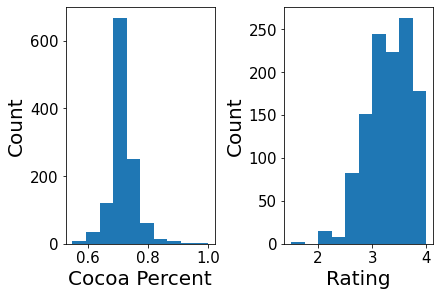

In [19]:
# Create histograms of numerical data

# Create figure
fig, axes = plt.subplots(1, 2, layout = 'constrained')

# Specify features interested in
num_features = ['Cocoa Percent', 'Rating']
x_axes = num_features
y_axes = ['Count', 'Count']

# Create histograms
axes = np.ravel(axes)

for idx, ax in enumerate(axes):
    ax.hist(chocolate_usa[num_features[idx]].dropna(), bins = 10)
    ax.set_xlabel(x_axes[idx], fontsize = 20)
    ax.set_ylabel(y_axes[idx], fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 15)
    
plt.show()

**Conclusions:**

Cocoa Percent appears to be a normal distribution but Rating is heavily skewed left.

In [20]:
# Bar charts of some of the categorical features

#create a copy of the data frame for use with graphing
chocolate_plots = chocolate_usa.copy()

In [21]:
# Convert Ratings to ranking
chocolate_plots.loc[chocolate_plots.Rating <= 5, 'Rank'] = 'Outstanding'
chocolate_plots.loc[chocolate_plots.Rating <= 3.9, 'Rank'] = 'Highly Recommended'
chocolate_plots.loc[chocolate_plots.Rating <= 3.49, 'Rank'] = 'Recommended'
chocolate_plots.loc[chocolate_plots.Rating <= 2.9, 'Rank'] = 'Disappointing'
chocolate_plots.loc[chocolate_plots.Rating <= 1.9, 'Rank'] = 'Unpleasant'

chocolate_plots.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER,Rank
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Recommended
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Recommended
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended


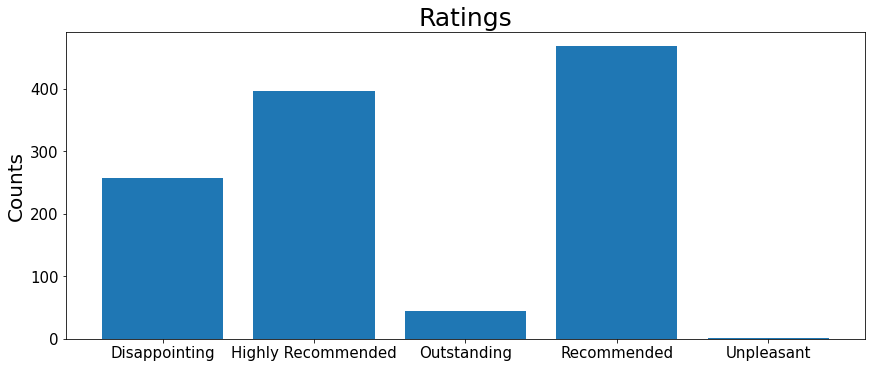

In [22]:
# Count of Ratings
fig, ax = plt.subplots(1, 1, figsize = (12, 5), layout = 'constrained')

# make the data read to feed into the visulizer
X_Rankings = chocolate_plots.groupby('Rank').size().reset_index(name = 'Counts')['Rank']
Y_Rankings = chocolate_plots.groupby('Rank').size().reset_index(name = 'Counts')['Counts']

# make the bar plot
ax.bar(X_Rankings, Y_Rankings)
ax.set_title('Ratings', fontsize = 25)
ax.set_ylabel('Counts', fontsize = 20)
ax.tick_params(axis='both', labelsize = 15)

**Conclusions:**

* There are more Recommended and Highly Recommended chocolates with minimal Outstanding and Unpleasant.

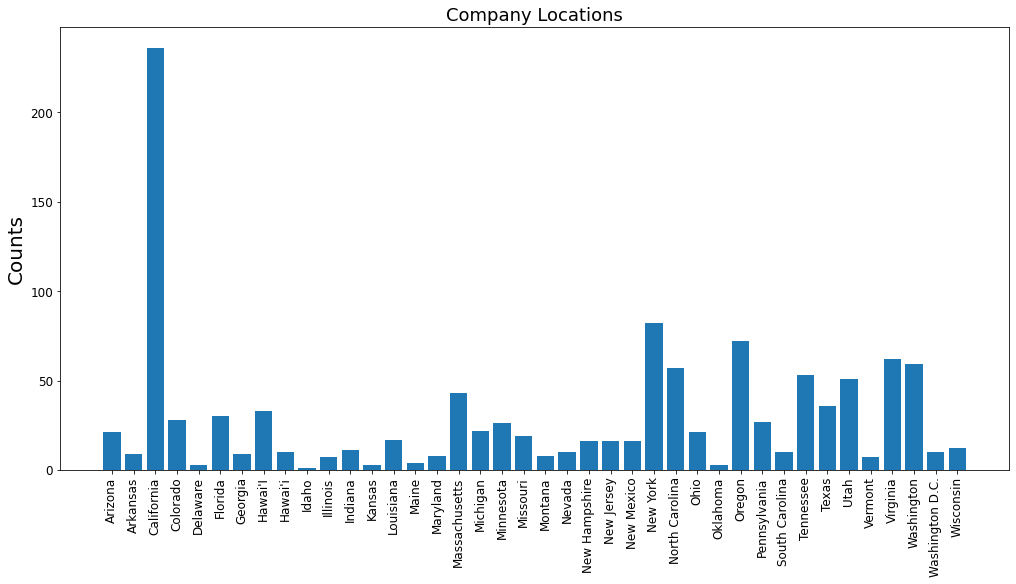

In [23]:
# Count of States Chocolate Makers
fig, ax = plt.subplots(1, 1, figsize = (14, 8), layout = 'constrained')

# make the data read to feed into the visulizer
X_Locations = chocolate_plots.groupby('STATE').size().reset_index(name='Counts')['STATE']
Y_Locations = chocolate_plots.groupby('STATE').size().reset_index(name='Counts')['Counts']

# make the bar plot
ax.bar(X_Locations, Y_Locations)
ax.set_xticks(X_Locations)
ax.set_xticklabels(X_Locations, rotation = 90)
ax.set_title('Company Locations', fontsize = 18)
ax.set_ylabel('Counts', fontsize = 20)
ax.tick_params(axis='both', labelsize = 12)

**Conclusions:**

* There are significantly more companies from the California then the rest of the states.

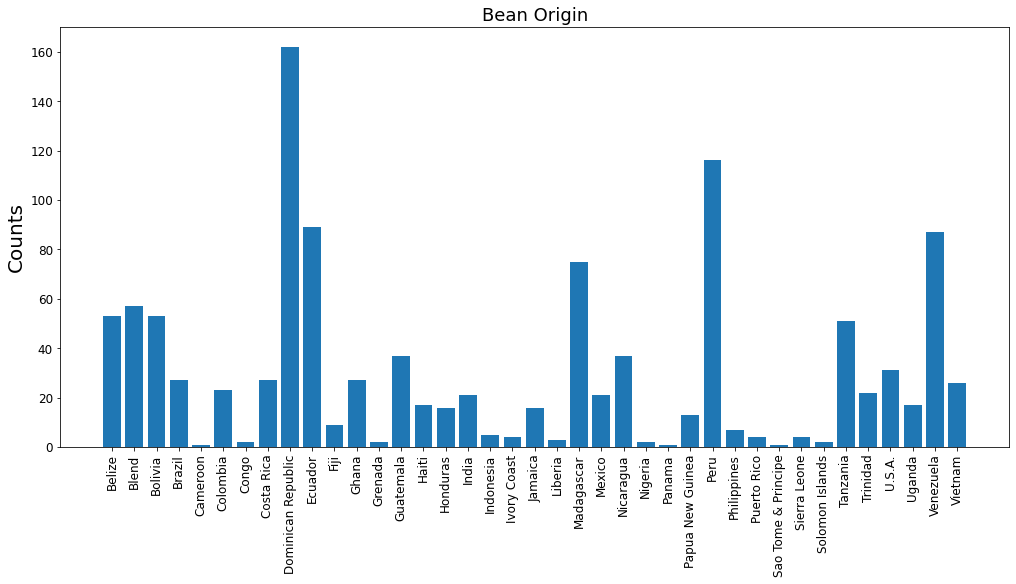

In [24]:
# Count of Country of Bean Origin
fig, ax = plt.subplots(1, 1, figsize = (14, 8), layout = 'constrained')

# make the data read to feed into the visulizer
X_Origin = chocolate_plots.groupby('Country of Bean Origin').size().reset_index(name='Counts')['Country of Bean Origin']
Y_Origin = chocolate_plots.groupby('Country of Bean Origin').size().reset_index(name='Counts')['Counts']

# make the bar plot
ax.bar(X_Origin, Y_Origin)
ax.set_xticks(X_Origin)
ax.set_xticklabels(X_Origin, rotation = 90)
ax.set_title('Bean Origin', fontsize = 18)
ax.set_ylabel('Counts', fontsize = 20)
ax.tick_params(axis='both', labelsize = 12)

**Conclusions:**
* Dominican Republic, Peru, Ecuador, and Venezula are the top producers of cacao beans used in US companies making chocolates.

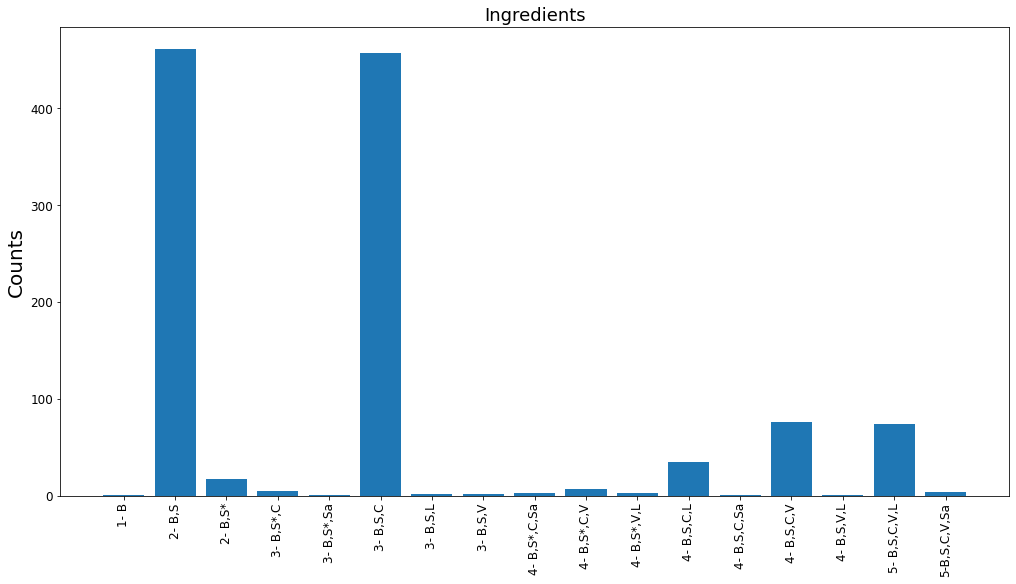

In [25]:
# Count of Country of Bean Origin
fig, ax = plt.subplots(1, 1, figsize = (14, 8), layout = 'constrained')

# make the data read to feed into the visulizer
X_Origin = chocolate_plots.groupby('Ingredients').size().reset_index(name='Counts')['Ingredients']
Y_Origin = chocolate_plots.groupby('Ingredients').size().reset_index(name='Counts')['Counts']

# make the bar plot
ax.bar(X_Origin, Y_Origin)
ax.set_xticks(X_Origin)
ax.set_xticklabels(X_Origin, rotation = 90)
ax.set_title('Ingredients', fontsize = 18)
ax.set_ylabel('Counts', fontsize = 20)
ax.tick_params(axis='both', labelsize = 12)

**Conclusions**

Most of the chocolate is made with 2 ingredients of Butter and Sugar and 3 ingredients of Button, Sugar, and Cocoa Butter.

(-0.5, 1599.5, 799.5, -0.5)

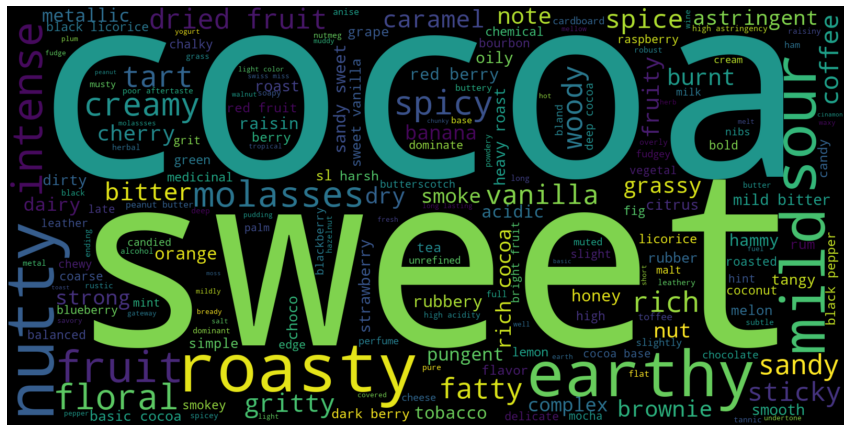

In [26]:
# Most frequent words in the Characteristics

word_string = " ".join(chocolate_usa['Most Memorable Characteristics'].str.lower())

plt.figure(figsize=(15,15))

word_cloud = WordCloud(background_color = "black", width=1600, height=800)
word_cloud.generate(word_string)

plt.imshow(word_cloud.recolor(colormap = 'viridis' , random_state = 17), interpolation="bilinear")
plt.axis('off')

**Conclusions:**
* Not looking at the other features, it looks like cocoa, sweet, nutty and roasty seem to characterize most frequently about the company's chocolate the most.

**Final Milestone 1 Conclusion**

Just looking at the United States chocolatiers, most of the chocolate is rated fairly high and most is made in California. Dominican Republic and Peru also seem to initially be the beans of choice.

Further analysis needs to be done with correlations between the features and breaking down some of the features to further look into what makes a good chocolate.  If I have time it would be interesting to compare US companies with the rest of the world.